**Time series** is defined as 'a series of data points listed (or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.'

Time series data is represented by:

yt= y(t-1)+ εt

where 'yt' is the observed value at time 't'

'εt' is the error at time 't'

**Time series analysis** is defined as 'methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.' (Source: Wikipedia)

 

Time series data must be a stationary series to perform time series analysis. Let us understand what a stationary series is.

**A stationary series exhibits the following characteristics:**

mean is constant

variance is constant

co-variance is constant

Performing time series analysis on a non-stationary series will result in inaccurate predictions. 

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# In case if you are working in a notebook
%matplotlib inline
# Reading the data
AirPassengers = pd.read_csv('AirPassengers.csv', parse_dates=[0])#Marking first column to datetype format
# Summary of the data
AirPassengers.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


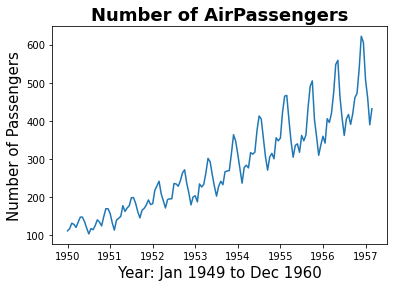

In [2]:
# Importing necessary libraries
import matplotlib.pyplot as plt
# Feching years
year = AirPassengers['Travel date'].dt.year
# Visualizing the time series by plotting number of passengers versus time
fig, ax = plt.subplots()
ax.plot(AirPassengers.Passengers)
ax.set_title('Number of AirPassengers', weight='bold', fontsize=18) # Title
ax.set_ylabel('Number of Passengers', fontsize=15)
ax.set_xlabel('Year: Jan 1949 to Dec 1960', fontsize=15)
ax.set_xticklabels(np.unique(year))
fig.show()

In [3]:
# Analysing the datatype of columns
AirPassengers.dtypes

Travel date    datetime64[ns]
Passengers              int64
dtype: object

In [4]:
# Importing necessary library
import pandas as pd
# Changing the datatype of Travel date
AirPassengers['Travel date'] = pd.to_datetime(AirPassengers['Travel date'])
AirPassengers.dtypes

Travel date    datetime64[ns]
Passengers              int64
dtype: object

In [5]:
# Making Travel date as Index and dropping current column to change the frequency
AirPassengers.index = AirPassengers['Travel date']
AirPassengers.drop(['Travel date'], axis=1, inplace=True)
# Changing frequency from daily to month end and getting the mean passenger for each month
AirPassengers.resample('M').mean().head()
# Note - M is one of the DateOffset object provided by Pandas.

,Passengers
Travel date,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0


#### Creating a date time range with a particular frequency:
The below python script generates date from January 1st, 1910 to January 10th, 1910 and a random uniformly distributed numeric value.

In [6]:
#importing necessary libraries
import numpy as np
# Generating 10 random values
np.random.seed(42)
val = np.arange(500)
np.random.shuffle(val)
val = val[:10]
val

array([361,  73, 374, 155, 104, 394, 377, 124,  68, 450])

In [7]:
# importing necessary library
import pandas as pd
#creating dataframe with dummy values
dummy_ = pd.DataFrame(val, index=pd.date_range(start='1/1/1910', end='1/10/1910', freq='D'), 
                      # DateOffset 'D' refers to daily 
                      columns=['RandomData'])
dummy_

,RandomData
1910-01-01,361
1910-01-02,73
1910-01-03,374
1910-01-04,155
1910-01-05,104
1910-01-06,394
1910-01-07,377
1910-01-08,124
1910-01-09,68
1910-01-10,450


#### Converting an unsorted date into a sorted date:  
Let us try to generate random dates between January 1st, 1910 and January 10th, 1910 and assign random data generated for the previous case and later try to rearrange the data in sorted date manner.

In [8]:
#importing necessary libraries
import numpy as np
import pandas as pd
# Creation of unordered date
np.random.seed(42)
date = pd.date_range(start='1/1/1910', end='1/10/1910', freq='D')
# generating unordered index
idx_ = np.arange(10) 
np.random.shuffle(idx_)
unordered_data = pd.DataFrame(val, index=date[idx_], columns=['Random data'])
unordered_data

,Random data
1910-01-09,361
1910-01-02,73
1910-01-06,374
1910-01-01,155
1910-01-08,104
1910-01-03,394
1910-01-10,377
1910-01-05,124
1910-01-04,68
1910-01-07,450


In [9]:
# sorting dataframe based on date index
unordered_data.sort_index(inplace=True)
unordered_data

,Random data
1910-01-01,155
1910-01-02,73
1910-01-03,394
1910-01-04,68
1910-01-05,124
1910-01-06,374
1910-01-07,450
1910-01-08,104
1910-01-09,361
1910-01-10,377


### Patterns in time series data

Analyzing the past data can be done by keeping in mind the following factors: 

Trend: shows a long term increase or decrease in data

Seasonal: when the data is affected by seasonal factors

Cyclic: data shows fluctuations across any period of time

Random: If the above 3 components are missing in a data

### Decomposition models
There are basically two decomposition models.

1. Additive model is used when seasonal variations are relatively constant over time

2. Multiplicative model is used when seasonal variations increase or decrease over time

1. Additive model

Additive model can be used to understand the seasonal effects on the data when the variations are relatively constant. The time series data may be decomposed as follows:

 Time Series Data = (Seasonal) + (Trends) + (Random)

Before proceeding with the decomposition of the data, we need to define the seasonal span by setting the frequency.

For example, if the data is in terms of years then you can set the year-end frequency by dateoffset 'A'. Similarly, for quarter end you can use 'Q'.

In [10]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
AP_reshaped = pd.DataFrame(AirPassenger.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [11]:
# Importing libraries
import numpy as np
import pandas as pd
# Extracting the seasonal values
seasonal_data = np.round(seasonal_decompose(AirPassenger, model='additive').seasonal, 2)
# Getting output corresponding to each month
AP_season = pd.DataFrame(seasonal_data.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1950,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1951,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1952,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1953,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1954,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1955,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1956,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1957,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1958,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62


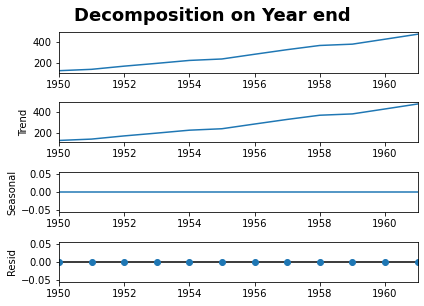

In [12]:
# Importing libraries
import matplotlib.pyplot as plt
# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='additive').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()

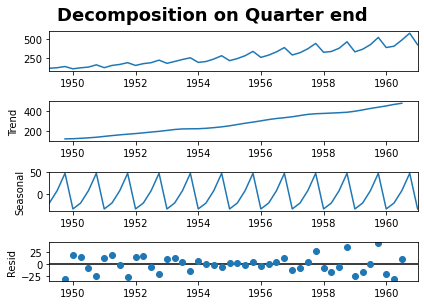

In [13]:
# Importing libraries
import matplotlib.pyplot as plt
# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='additive').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

### Deseasonalized data

The seasonality factor makes it difficult for us to identify whether the data is depicting an upward trend or a downward trend. Therefore, we need to remove the seasonality factor from our data. The process of removing the seasonality factor from the data is known as de-seasonalization and the resultant values are known as seasonally adjusted values. 

Let's calculate the seasonally adjusted values in the AirPassengers data using the below formula:

  Seasonally adjusted values = Time Series Data - (Seasonal) = (Trends) + (Random)

The number of passengers taking the international flight in December 1959 is 405 and the seasonal effect for December is -28.619949. So, the seasonally adjusted values can be computed as follows:

seasonally adjusted value = (405 - (-28.619949)) = 433.619949

Similarly, the seasonally adjusted value of the AirPassengers data for the yearly basis is computed below.

In [14]:
# Deseasonalized data
AP_deseasonalized = AP_reshaped - AP_season
AP_deseasonalized

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,136.75,154.19,134.24,137.04,125.51,99.6,84.17,85.18,119.48,139.64,157.59,146.62
1950,139.75,162.19,143.24,143.04,129.51,113.6,106.17,107.18,141.48,153.64,167.59,168.62
1951,169.75,186.19,180.24,171.04,176.51,142.6,135.17,136.18,167.48,182.64,199.59,194.62
1952,195.75,216.19,195.24,189.04,187.51,182.6,166.17,179.18,192.48,211.64,225.59,222.62
1953,220.75,232.19,238.24,243.04,233.51,207.6,200.17,209.18,220.48,231.64,233.59,229.62
1954,228.75,224.19,237.24,235.04,238.51,228.6,238.17,230.18,242.48,249.64,256.59,257.62
1955,266.75,269.19,269.24,277.04,274.51,279.6,300.17,284.18,295.48,294.64,290.59,306.62
1956,308.75,313.19,319.24,321.04,322.51,338.6,349.17,342.18,338.48,326.64,324.59,334.62
1957,339.75,337.19,358.24,356.04,359.51,386.6,401.17,404.18,387.48,367.64,358.59,364.62
1958,364.75,354.19,364.24,356.04,367.51,399.6,427.17,442.18,387.48,379.64,363.59,365.62


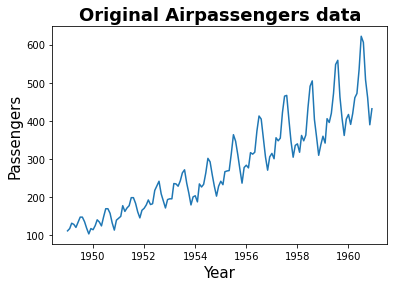

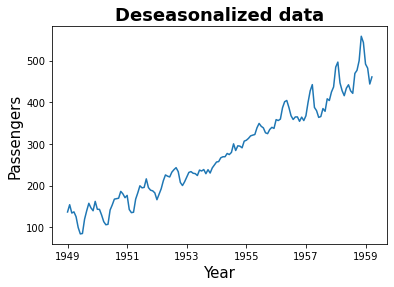

In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()
# Melting the data by forming it to a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()

2. Multiplicative model

It is useful when the seasonal variations change over a period of time.

Time Series Data = (Seasonal) * (Trends) * (Random)

In [16]:
# Importing libraries
import numpy as np
import pandas as pd
# Extracting the seasonal values
seasonal_data_mult = np.round(seasonal_decompose(AirPassenger, model='multiplicative').seasonal, 2)
# Getting output corresponding to each month
AP_season_mult = pd.DataFrame(seasonal_data_mult.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season_mult

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1950,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1951,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1952,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1953,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1954,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1955,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1956,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1957,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1958,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9


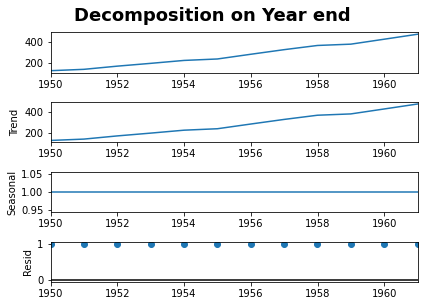

In [17]:
# Importing libraries
import matplotlib.pyplot as plt
# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()

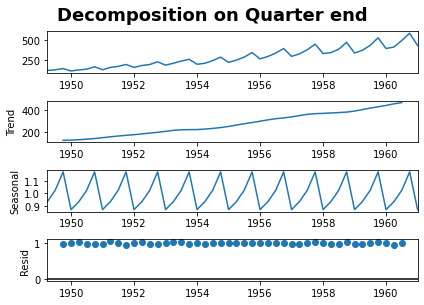

In [18]:
# Importing libraries
import matplotlib.pyplot as plt
# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

### Deseasonalized data

The number of passengers taking the international flight in the month of December 1959 is 405 and the seasonal effect for December is 0.9. So, the seasonally adjusted value is calculated by:

Time Series Data = (Seasonal) * (Trends) * (Random)

Time Series Data/(Seasonal) = (Trends) * (Random)

So, the seasonally adjusted value is (405/0.9), i.e. 450.5886.

In [19]:
# Importing libraries
import numpy as np
# Multiplicative Deseasonalized data
AP_deseasonalized_mult = np.round(AP_reshaped / AP_season_mult, 2)
AP_deseasonalized_mult

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,123.08,134.09,130.69,131.63,123.47,121.62,120.33,121.31,128.30,129.35,130.00,131.11
1950,126.37,143.18,139.60,137.76,127.55,134.23,138.21,139.34,149.06,144.57,142.50,155.56
1951,159.34,170.45,176.24,166.33,175.51,160.36,161.79,163.11,173.58,176.09,182.50,184.44
1952,187.91,204.55,191.09,184.69,186.73,196.40,186.99,198.36,197.17,207.61,215.00,215.56
1953,215.38,222.73,233.66,239.80,233.67,218.92,214.63,222.95,223.58,229.35,225.00,223.33
1954,224.18,213.64,232.67,231.63,238.78,237.84,245.53,240.16,244.34,248.91,253.75,254.44
1955,265.93,264.77,264.36,274.49,275.51,283.78,295.93,284.43,294.34,297.83,296.25,308.89
1956,312.09,314.77,313.86,319.39,324.49,336.94,335.77,331.97,334.91,332.61,338.75,340.00
1957,346.15,342.05,352.48,355.10,362.24,380.18,378.05,382.79,381.13,377.17,381.25,373.33
1958,373.63,361.36,358.42,355.10,370.41,391.89,399.19,413.93,381.13,390.22,387.50,374.44


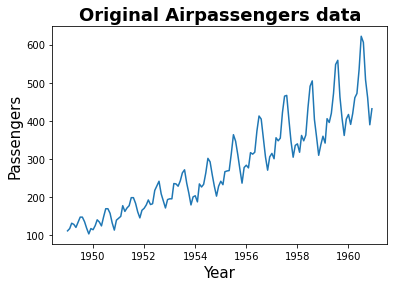

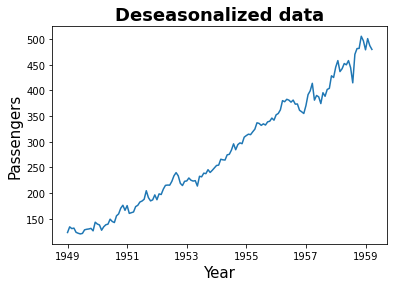

In [20]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized_mult.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()

#### Conclusion
We observe that there are more variations in the trend of the additive model as compared to the multiplicative model. By looking at these observations we may conclude that deseasonalized AirPassengers data might give us a clearer trend using the multiplicative model.

### Smoothing the series

we can observe that the seasonally adjusted values (assuming it to be a multiplicative model) have too many variations, due to which we may not be able to get a clear trend to forecast accurately. Hence, we need to remove these variations in the data to obtain a clear trend pattern for forecasting.

This process is known as smoothing. In the short term forecasting, the current smoothed value of the series is used as the forecast for the near future. For example, the smoothed value of December 1960 will be the forecasted value for January 1961.

Commonly used smoothing techniques are:

Simple moving average

Exponential smoothing

MA =   ( α(0)y(t) + α(1)y(t -1) + … + α(n-1) y(t -n) ) / n

  'α' is the weight assigned to the data

  'yt' is the last day data(latest data)

  'n' is the time period for which we want to calculate the moving average.

 In simple moving average each data is assigned equal weights, i.e. α(0)  = α(1) = ... = α(n-1) = 1 or any constant.

  SMA =   ( y(t) + y(t -1) + … + y(t -n) ) / n

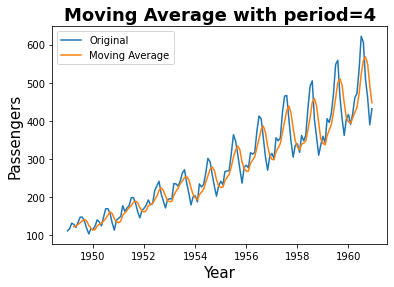

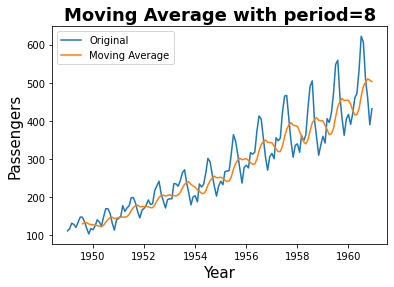

In [21]:
# Importing libraries
import matplotlib.pyplot as plt
# 4 period moving average
plt.plot(AirPassenger, label='Original')
plt.plot(AirPassenger.rolling(4, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=4', weight='bold', fontsize=18)
plt.show()
# 8 period moving average
plt.plot(AirPassenger, label='Original')
plt.plot(AirPassenger.rolling(8, center=False).mean(), label='Moving Average')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Moving Average with period=8', weight='bold', fontsize=18)
plt.show()

Among the above plots, the first one showcases that there is a sudden fall (abrupt shift) in the series. If there is an abrupt shift (sudden rise and fall) in the series then 'n' is set to a lower value, this is known as under smoothing. In under smoothing, there will be a lot of variations that will disguise the trend. For example, in the 4 period moving average figure, the trend is slightly disguised, due to the variations. 

We can observe from another given figure, that there is a gradual increase in the series with fluctuations. If there are fluctuations (irregular rise and fall) in the series then 'n' is set to a large value, this is known as over smoothing. In over smoothing, some of the interesting patterns might be lost. For example, in the 8 period moving average figure, we may not be able to observe some interesting patterns, present in this dataset. Over smoothing might suppress these variations.

The value of 'n' should be set in a manner where both under smoothing and over smoothing can be avoided.

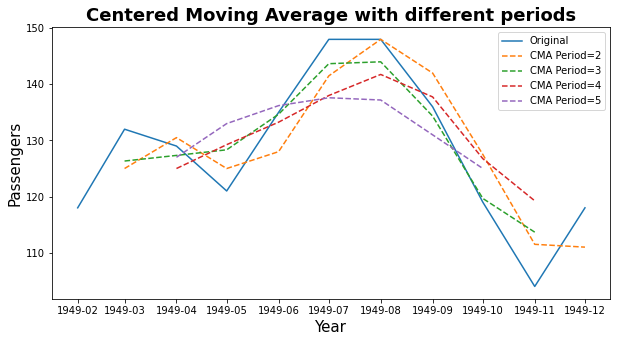

In [22]:
# Importing libraries
import matplotlib.pyplot as plt
# Centered Moving Averages
plt.figure(figsize=(10, 5))
plt.plot(AirPassenger.iloc[1:12], label='Original')
plt.plot(AirPassenger.iloc[1:12].rolling(2, center=True).mean(), '--', label='CMA Period=2')
plt.plot(AirPassenger.iloc[1:12].rolling(3, center=True).mean(), '--', label='CMA Period=3')
plt.plot(AirPassenger.iloc[1:12].rolling(4, center=True).mean(), '--', label='CMA Period=4')
plt.plot(AirPassenger.iloc[1:12].rolling(5, center=True).mean(), '--', label='CMA Period=5')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Centered Moving Average with different periods', weight='bold', fontsize=18)
plt.show()

We can make the trend line symmetric by placing the average in the middle of the time series, this is known as **centered moving average.** 

We can observe that 3rd (green) and 5th (purple) period centered moving average are symmetric, on the other hand, 2nd (yellow) and 4th (red) period centered moving average are asymmetric.

### Exponential smoothing

Exponential smoothing works on the original data in order to identify trend patterns. 

Exponential smoothing equation:

  St= αy(t)+ (1 - α) S(t-1)

  St= αy(t)+ α(1-α) y(t-1)+ α(1-α)2 y(t-2)+ …+(1-α)(t-1) y(1) (Expanded)

  St is an exponentially smoothed time series at 't', where 't' > 0.

  'y(t)' denotes the latest observation in the series at period 't' and 'y1'is the first observation.

  'α' is a smoothing constant (alpha).

alpha is a constant between 0 and 1. Usually, alpha is not set to 0 or 1, because if we set alpha to 0 then the smoothed series will depend only on the latest estimation and if we set it to 1 then the smoothed series will depend only on the latest observation.

Exponential smoothing uses the latest observed observation (y(t)) and the latest estimation (S(t-1)) to predict future observation using (S(t)).

In [23]:
# Importing libraries
import numpy as np
# Exponential smoothing is calculated and rounded off to 2 decimal values
np.round(AirPassenger.ewm(alpha=0.2,adjust=False).mean().head(),2)

,Passengers
Travel date,
1949-01-01,112.00
1949-02-01,113.20
1949-03-01,116.96
1949-04-01,119.37
1949-05-01,119.69


#### Estimation of smoothing constant
In unforeseen situations such as natural calamities and economy crashes, there may be a sudden shift in the observed data. By setting alpha to a larger value we give more weight to these observations and less weight to the forecasted values. If we set alpha to a lower value, more weight is given to the recent forecasted value. If there is a sudden change in the series i.e. if y(t) observed to be very high or low, then this change will not be captured in the smoothing. The accuracy of the forecast depends on choosing a proper value of alpha.

In [24]:
# Importing libraries
import pandas as pd 
# Setting frequency
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)
AirPassenger = AirPassenger.resample('M').mean()
AirPassenger.head()

,Passengers
Travel date,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0


In [25]:
# Importing libraries
import numpy as np
# Simple exponential smoothing
# Finding alpha value for the forecasted value and mean squared error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
for i in range(1, 11):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=i/10, optimized=False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2))

alpha =  0.1 | Forecasted value:  416.61 | MSE:  134.79
alpha =  0.2 | Forecasted value:  431.22 | MSE:  687.49
alpha =  0.3 | Forecasted value:  428.98 | MSE:  575.04
alpha =  0.4 | Forecasted value:  419.08 | MSE:  198.25
alpha =  0.5 | Forecasted value:  406.36 | MSE:  1.85
alpha =  0.6 | Forecasted value:  393.78 | MSE:  125.89
alpha =  0.7 | Forecasted value:  382.81 | MSE:  492.4
alpha =  0.8 | Forecasted value:  373.96 | MSE:  963.48
alpha =  0.9 | Forecasted value:  367.15 | MSE:  1432.62
alpha =  1.0 | Forecasted value:  362.0 | MSE:  1849.0


We can observe from the above results that alpha 0.1 has an MSE value of 134.79 and for alpha 1 it is 1849. We can choose the value of alpha which has minimum MSE. In this example, we can set alpha to 0.5, since it has the minimum MSE value of 1.85 for the AirPassengers data. But this value of alpha may not be optimal - in this example, we have considered alpha up to 1 decimal place. Since alpha can take infinite values like 0.52442 or 0.5342, we are not sure if 0.5 is optimal. To find an optimal value of alpha we can use SciPy library to get optimal results.

In [26]:
# Importing libraries
import numpy as np
import scipy as sp
# Function to find optimum value of alpha
def optimum_alpha(x):
    model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=x, optimized = False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', mse)
    return mse
optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)
if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result   

alpha:  1.0 MSE:  1849.0
alpha:  1.05 MSE:  2035.81
alpha:  0.95 MSE:  1648.36
alpha:  0.9 MSE:  1432.62
alpha:  0.8 MSE:  963.48
alpha:  0.7 MSE:  492.4
alpha:  0.5 MSE:  1.85
alpha:  0.3 MSE:  575.04
alpha:  0.3 MSE:  575.04
alpha:  0.6 MSE:  125.89
alpha:  0.4 MSE:  198.25
alpha:  0.55 MSE:  25.7
alpha:  0.45 MSE:  61.62
alpha:  0.525 MSE:  3.5
alpha:  0.475 MSE:  21.25
alpha:  0.5125 MSE:  0.07
alpha:  0.525 MSE:  3.5
alpha:  0.50625 MSE:  0.3
alpha:  0.51875 MSE:  1.14
alpha:  0.50937 MSE:  0.02
alpha:  0.50625 MSE:  0.3
alpha:  0.51094 MSE:  0.0
alpha:  0.5125 MSE:  0.07
alpha:  0.51016 MSE:  0.0
alpha:  0.51172 MSE:  0.03
alpha:  0.51055 MSE:  0.0
alpha:  0.51055 MSE:  0.0
alpha:  0.51133 MSE:  0.01
alpha:  0.51074 MSE:  0.0
alpha:  0.51074 MSE:  0.0
alpha:  0.51113 MSE:  0.01
alpha:  0.51084 MSE:  0.0
alpha:  0.51084 MSE:  0.0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 33


array([0.5109375])

Alpha value suggested SciPy is 0.5109375 and MSE for this optimal value is 0, which is smaller than 1.85 (alpha=0.5).

In [27]:
# Importing libraries
import numpy as np
# Creating model using optimum alpha value
model = SimpleExpSmoothing(AirPassenger.iloc[:131]).fit(smoothing_level=optimum_alpha_result, optimized = False)
forecasted_val = np.round(model.forecast(1)[0], 2)
mse = np.round(mean_squared_error(np.array(AirPassenger.iloc[131]), np.array([forecasted_val])), 2)
print('Alpha: ', optimum_alpha_result[0], 
      '\nActual value: ', AirPassenger.iloc[131][0], 
      '\nForecasted value: ', np.round(forecasted_val).astype(int),
      '\nMean Squared Error: ', mse)

Alpha:  0.5109374999999995 
Actual value:  405.0 
Forecasted value:  405 
Mean Squared Error:  0.0


In [28]:
# Importing libraries
import numpy as np
# Forecasting values for next year
forecasted_data=np.round(model.forecast(13)).astype(int)
forecasted_data

1959-12-31    405
1960-01-31    405
1960-02-29    405
1960-03-31    405
1960-04-30    405
1960-05-31    405
1960-06-30    405
1960-07-31    405
1960-08-31    405
1960-09-30    405
1960-10-31    405
1960-11-30    405
1960-12-31    405
Freq: M, dtype: int32

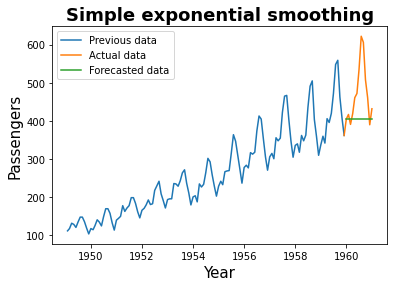

In [29]:
# Importing libraries
import matplotlib.pyplot as plt
# Visualizing the forecasted value
plt.plot(AirPassenger.iloc[:131], label='Previous data')
plt.plot(AirPassenger.iloc[130:], label='Actual data')
plt.plot(forecasted_data, label='Forecasted data')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Simple exponential smoothing', weight='bold', fontsize=18)
plt.legend()
plt.show()

## forecasting methods

Commonly used models for forecasting are as follows:

1. Seasonal Indexing

2. Autoregressive

3. Moving Average

4. Autoregressive moving average

5. Autoregressive integrated moving average

## 1
Seasonal indexing model can be used when we have to predict values based on seasonal data. Seasonality is the pattern that occurs within a year. We can recall that AirPassengers data had a seasonality component associated with it.

Considering the AirPassengers Data till the year 1959(yearly data: frequency = 12) assuming it to be a multiplicative model as we have seen earlier. We shall predict the future value for the year 1960 using seasonal indexing.

**Step 1:** Calculate the average number of passengers traveling each year.

In [31]:
# Excluding year 1960
AP = AP_reshaped.iloc[:11, :].copy()
# Finding average yearly
AP_yearly_mean = AP.mean(axis=1)
AP_yearly_mean

1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
dtype: float64

**Step 2:** Divide the monthly data by the average of the corresponding year. 

In [32]:
# Dividing with mean values
AP_month_avg = AP.div(AP_yearly_mean.values, axis=0)
AP_month_avg

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,0.884211,0.931579,1.042105,1.018421,0.955263,1.065789,1.168421,1.168421,1.073684,0.939474,0.821053,0.931579
1950,0.823389,0.902148,1.009547,0.966587,0.894988,1.066826,1.217184,1.217184,1.131265,0.952267,0.816229,1.002387
1951,0.852106,0.881489,1.046033,0.957884,1.010774,1.046033,1.169442,1.169442,1.081293,0.952008,0.857982,0.975514
1952,0.868020,0.913706,0.979695,0.918782,0.928934,1.106599,1.167513,1.228426,1.060914,0.969543,0.873096,0.984772
1953,0.871111,0.871111,1.048889,1.044444,1.017778,1.080000,1.173333,1.208889,1.053333,0.937778,0.800000,0.893333
1954,0.853854,0.786885,0.983607,0.950122,0.979421,1.104988,1.264039,1.226369,1.084060,0.958493,0.849669,0.958493
1955,0.852113,0.820423,0.940141,0.947183,0.950704,1.109155,1.281690,1.221831,1.098592,0.964789,0.834507,0.978873
1956,0.865194,0.843869,0.965727,0.953542,0.968774,1.139375,1.258187,1.233816,1.081493,0.932216,0.825590,0.932216
1957,0.855010,0.817010,0.966297,0.944583,0.963583,1.145442,1.262158,1.267587,1.096584,0.941868,0.827867,0.912011
1958,0.892388,0.834646,0.950131,0.913386,0.952756,1.141732,1.288714,1.325459,1.060367,0.942257,0.813648,0.884514


**Step 3:** Compute the average across each year for the values of each month from step 2 in order to obtain the Seasonal Indexm

In [33]:
# Finding monthly average
AP_SI = AP_month_avg.mean(axis=0)
AP_SI

Jan    0.859806
Feb    0.854664
Mar    0.989094
Apr    0.958132
May    0.963956
Jun    1.100717
Jul    1.230005
Aug    1.233862
Sep    1.082047
Oct    0.949172
Nov    0.833162
Dec    0.945383
dtype: float64

The seasonal index(SI) can be used to calculate the increase or decrease in the predicted values using the formula:

(1-SI)*100.

For example, let's estimate the change in predicted value for January and July 1960

Change in predicted value for January 1960 = ((1-0.8598)*100) = 14.02

Change in predicted value for July 1960 = ((1-1.230005)*100) = -23.30

Therefore the number of Passengers traveling in January 1960 will be 14.02% less than the average seasonal index while in the month of July it will be 23.30% more.

**Step 4:** Divide the AirPassenger data by the seasonal index to obtain the data that does not have a seasonal factor as we have assumed it to be multiplicative model. If the decomposition of the data is of type additive model then we need to subtract it from the seasonal index, this is known as deseasonalized data.

In [34]:
# Dividing by seasonal index, assuming multiplicative model
AP_deseasonalized = AP.div(AP_SI)
AP_deseasonalized

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,130.261979,138.065893,133.455483,134.637038,125.524362,122.647342,120.324684,119.948587,125.687679,125.372477,124.825719,124.817077
1950,133.751139,147.426293,142.554721,140.899226,129.673928,135.366325,138.210786,137.778782,146.019509,140.122180,136.828192,148.088058
1951,168.642740,175.507491,179.962697,170.122769,178.431324,161.712791,161.787920,161.282221,170.048036,170.675136,175.236105,175.590126
1952,198.882128,210.608989,195.128093,188.909332,189.842630,198.052744,186.991063,196.132148,193.152389,201.228093,206.442535,205.207737
1953,227.958463,229.329788,238.602228,245.269022,237.562636,220.765215,214.633221,220.446051,219.029264,222.299097,216.044513,212.612140
1954,237.262890,219.969389,237.591201,236.919439,242.749593,239.843690,245.527396,237.465783,239.361094,241.263001,243.650201,242.229752
1955,281.458918,272.621636,269.944046,280.754753,280.095684,286.177130,295.933683,281.230808,288.342322,288.672761,284.458609,294.060572
1956,330.307160,324.103834,320.495365,326.677464,329.890472,339.778561,335.770909,328.237686,328.081809,322.386369,325.267017,323.678184
1957,366.361815,352.185032,359.925394,363.206893,368.273955,383.386505,378.047150,378.486418,373.366340,365.581928,366.075426,355.411339
1958,395.438150,372.075881,365.991552,363.206893,376.573086,395.196990,399.185270,409.284028,373.366340,378.224530,372.076662,356.469111


**Step 5:** Use linear regression to forecast the trend values for each month of 1960. (intercept=93.839; slope= 2.533)

In [35]:
# Importing libraries
import numpy as np
import pandas as pd
# Reading data
AP_1D = pd.DataFrame(AP_deseasonalized.values.reshape(-1, 1), columns=['value'])
# Building Linear Regression model and predicting trend values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(1, 133).reshape(-1, 1), AP_1D.value.values.reshape(-1, 1) )
pred = pd.DataFrame(model.predict(np.arange(133, 145).reshape(-1, 1)), columns=['Trend values'], index=cols)
pred['Regression equations'] = pred['Trend values'].apply(lambda x: str(np.round(model.coef_[0][0], 2)) + ' * '+ str(np.round(x, 2)) + ' + ' + str(np.round(model.intercept_[0], 2)))
pred

,Trend values,Regression equations
Jan,430.727157,2.53 * 430.73 + 93.84
Feb,433.260150,2.53 * 433.26 + 93.84
Mar,435.793142,2.53 * 435.79 + 93.84
Apr,438.326135,2.53 * 438.33 + 93.84
May,440.859127,2.53 * 440.86 + 93.84
Jun,443.392120,2.53 * 443.39 + 93.84
Jul,445.925113,2.53 * 445.93 + 93.84
Aug,448.458105,2.53 * 448.46 + 93.84
Sep,450.991098,2.53 * 450.99 + 93.84
Oct,453.524090,2.53 * 453.52 + 93.84


**Step 6:** Calculate the monthly occupancy for the year 1960 by multiplying the seasonality index with the trend value.

In [36]:
# Importing libraries
import numpy as np
import pandas as pd
# Creating dataframe with seasonal index, trend values, monthly occupancy, and error in order to compare
out = pd.DataFrame(AP_SI, columns=['Seasonal Index'])
out.index.name = 1960
out['Trend values'] = pred['Trend values']
out['Monthly occupancy'] = np.round(AP_SI * pred['Trend values']).astype(int)
out['Error'] = AP_reshaped.loc[1960] - AP_SI * pred['Trend values']
out

,Seasonal Index,Trend values,Monthly occupancy,Error
1960,,,,
Jan,0.859806,430.727157,370,46.658308
Feb,0.854664,433.260150,370,20.707986
Mar,0.989094,435.793142,431,-12.040324
Apr,0.958132,438.326135,420,41.025880
May,0.963956,440.859127,425,47.031065
Jun,1.100717,443.392120,488,46.950806
Jul,1.230005,445.925113,548,73.509746
Aug,1.233862,448.458105,553,52.664596
Sep,1.082047,450.991098,488,20.006349


**Conclusion**

We can observe from the above results that in August, the number of passengers boarding the international flight will be maximum, and in the month of November, it will be minimum.

Sum of the seasonal index is always equal to the seasonal span (Eg: for yearly data it is 12, quarterly data it is 4 and monthly data it is 1).

Mean of the seasonal index is always 1.

## 2
The autoregressive and moving average models are used as stand alone models as well as in a combination depending on the type of data we are working with.

In order to use autoregressive, moving average, or autoregressive moving average models, we need to ensure that the series is stationary. Recall that we have learnt the properties of a stationary series:

mean is constant

variance is constant

co-variance is constant

### Stationary time series

A series is said to be "stationary" if its mean and variance is constant over time and the series should not have any trend. 

A series that is non-stationary can be made stationary after differencing.

A series that is stationary after being differenced by 1 is said to be Integrated of order 1 and is denoted by I(1)

In general, a series that is stationary after being differenced 'd' times is said to be Integrated of order d, denoted by I(d)

A series that is not differenced is said to be I(0)

Below are the steps to compute Difference:

Diff(1) = AirPassengers[n] – AirPassengers[n-1]

Diff(2) = Diff(1)[n] – Diff(1)[n-1]

Lag is the delay in the series, below are the steps to compute lag:

Lag(1) = AirPassengers[n] – AirPassengers[n-1]

Lag(2) = AirPassengers[n] – AirPassengers[n-2]

Here AirPassengers[n] is the observed value of a time series data at a given point of time and 'n' is greater than 1. The below figure shows the diff and lag of the original data.

In [37]:
# Importing libraries
import numpy as np
import pandas as pd
# Taking year 1949 data
st = pd.DataFrame(AirPassenger.iloc[:12].T.values[0], columns=['Year 1949'], index=cols)
# Lag 1
st['lag1'] = AirPassenger.iloc[:12].diff(1).T.values[0]
# Lag 2
st['lag2'] = AirPassenger.iloc[:12].diff(2).T.values[0]
# Difference with order 1
st['diffOrd1'] = np.concatenate(([np.nan], np.diff(AirPassenger.iloc[:12].T.values[0], 1)))
# Difference with order 2
st['diffOrd2'] = np.concatenate(([np.nan, np.nan], np.diff(AirPassenger.iloc[:12].T.values[0], 2)))
st

,Year 1949,lag1,lag2,diffOrd1,diffOrd2
Jan,112.0,NaN,NaN,NaN,NaN
Feb,118.0,6.0,NaN,6.0,NaN
Mar,132.0,14.0,20.0,14.0,8.0
Apr,129.0,-3.0,11.0,-3.0,-17.0
May,121.0,-8.0,-11.0,-8.0,-5.0
Jun,135.0,14.0,6.0,14.0,22.0
Jul,148.0,13.0,27.0,13.0,-1.0
Aug,148.0,0.0,13.0,0.0,-13.0
Sep,136.0,-12.0,-12.0,-12.0,-12.0
Oct,119.0,-17.0,-29.0,-17.0,-5.0


Below figure shows the differenced (I(1)) series of the AirPassengers (Δ AirPassengers) along with the original series. Lag and diff help us to remove the trend. In Δ AirPassengers, the trend is removed and the mean is almost constant, but it still has unequal variances.

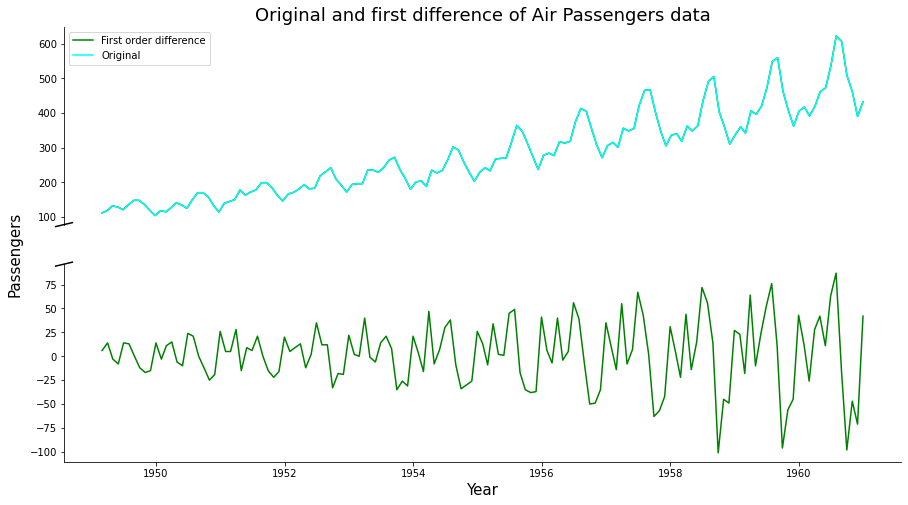

In [38]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# First order difference values
diffOrd1 = pd.DataFrame(np.concatenate(([np.nan], np.diff(AirPassenger.T.values[0], 1))), index=AirPassenger.index)
plt.figure(1, figsize=(15, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))
# Dummy plot, used to create legend label for second plot
ax1.plot(AirPassenger, label="First order difference", c='g') 
ax1.plot(AirPassenger, label='Original', c='cyan')
ax1.set_title('Original and first difference of Air Passengers data', fontsize=18)
# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Removing ticks and labels of x-axis
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Adding a diagonal mark on y-axis
d = .01 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,d),(-d,+d), **kwargs) 
plt.legend()
# Generating second plot
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.plot(diffOrd1, c='g')
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Passengers', fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d,d),(1-d,1+d), **kwargs) 
# Adding a common y-label
ax2.yaxis.set_label_coords(-0.05, 1.05)
plt.show()

We may use log transformation in order to have an equal variance for the AirPassengers data. We can observe from the below figures that the log(AirPassengers) data has almost uniform variance and the Δlog(AirPassengers) has no trend. Mean and variance is almost uniform.

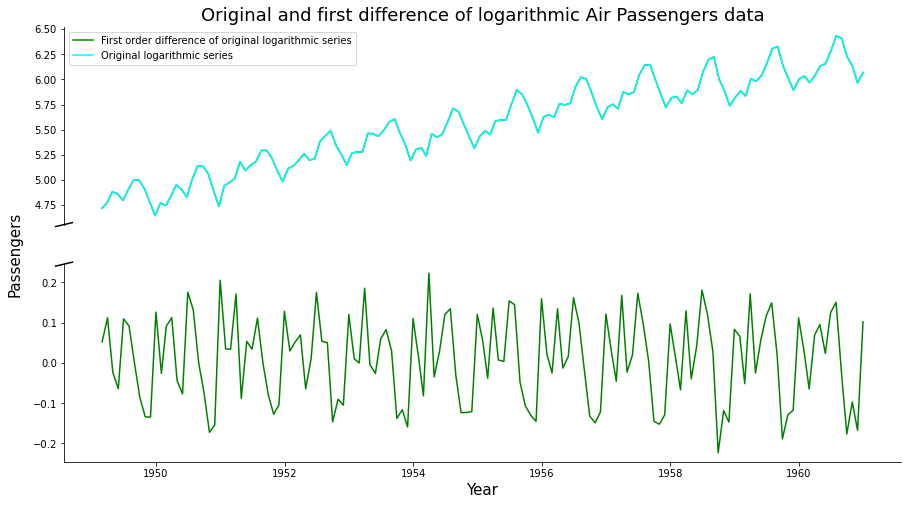

In [39]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# First order difference values of logarithmic series
diffOrd1 = pd.DataFrame(np.concatenate(([np.nan], np.diff(np.log(AirPassenger).T.values[0], 1))), index=AirPassenger.index)
plt.figure(1, figsize=(15, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))
# Dummy plot, used to create legend label for second plot
ax1.plot(np.log(AirPassenger), label="First order difference of original logarithmic series", c='g') 
ax1.plot(np.log(AirPassenger), label='Original logarithmic series', c='cyan')
ax1.set_title('Original and first difference of logarithmic Air Passengers data', fontsize=18)
# Removing bottom, top and right plot lines
ax1.spines['bottom'].set_visible(False) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Removing ticks and labels of x-axis
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Adding a diagonal mark on y-axis
d = .01 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,d),(-d,+d), **kwargs) 
plt.legend()
# Generating second plot
ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.plot(diffOrd1, c='g')
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Passengers', fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d,d),(1-d,1+d), **kwargs) 
# Adding a common y-label
ax2.yaxis.set_label_coords(-0.05, 1.05)
plt.show()

#### Conclusion
The plot of the series helps us to draw some conclusions, whether a particular series is stationary or not. We may also use Dickey-Fuller test to check the stationarity of a series.

#### adfuller test
We can check the stationarity of the series by using the Dickey-Fuller test. It uses hypothesis testing for checking the stationarity of a series as mentioned below. 

Hnull  : series is non-stationary

Halt : series is stationary

If the null hypothesis is rejected, then the series is assumed to be stationary, where the p-value will be less than 0.05.

If the null hypothesis is not rejected, then the series is assumed to be non-stationary. We need to difference the variable and repeat the dickey-fuller test to see if the differenced variable is stationary.

**Example 1:**  To check whether the series hsales is stationary or not, we can use adfuller method in python.

In [45]:
# Importing libraries
import pandas as pd
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
passenger = pd.read_csv('AirPassengers.csv', parse_dates=[0])
# Function for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def dffunc(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series([dftest[0],dftest[1], dftest[4]["5%"],dftest[5]], index=['Test Statistic','p-value', 'Critical Value at 5%','AIC'])
    return(dfoutput)
# Passing values as 1D numpy array
dffunc(passenger.T.values[1])

Test Statistic            0.815369
p-value                   0.991880
Critical Value at 5%     -2.884042
AIC                     996.692931
dtype: float64

**Example 2:**  To check whether the first differenced series of log(AirPassengers) is stationary or not.

In [46]:
# Importing libraries
import numpy as np
# Dickey-Fuller test of first order difference of log transformed Air passengers data
dffunc(np.diff(np.log(AirPassenger).T.values[0], 1))

Test Statistic           -2.717131
p-value                   0.071121
Critical Value at 5%     -2.884398
AIC                    -440.358470
dtype: float64

The series is still not stationary since the p-values (0.071) is greater than 0.05. 

Let us take the second difference of log(AirPassengers) series and check the stationarity once again.

In [47]:
# Importing libraries
import numpy as np
# Dickey-Fuller test of second order difference of log transformed Air passengers data
dffunc(np.diff(np.log(AirPassenger).T.values[0], 2))

Test Statistic         -8.196629e+00
p-value                 7.419305e-13
Critical Value at 5%   -2.884398e+00
AIC                    -4.308936e+02
dtype: float64

This time the p-value(7.41e-13) is much smaller than 0.05 and hence the series has become stationary.

#### Conclusion
Thus, we can utilize Dickey-Fuller test to quickly analyze if a series is stationary or not without visualization.

### Autoregressive model

Autoregressive model works only on stationary data and is used to examine the relationship between different values of the same variable. It is a linear model that can be used to predict future values based on past and present values. 

It is represented as AR(p), where p denotes the order or the number of observations considered.

AR(p) :  y(t) = β(0) + β(1)y(t-1) + β(2)y(t-2) + β(3)y(t-3) + … + β(p)y(t-p)+ ε(t)

Where 'β' is the coefficient & 'ε' is an error.

For p=1 and p=3

AR(1)  :  y(t) = β0 + β1y(t-1)+ ε(t)

AR(3)  :  y(t) = β0 + β1y(t-1) + β2y(t-2) + β3y(t-3)+ ε(t)

 

Conclusion
Autoregressive model helps us to predict the future. There are many ways to identify an appropriate order of the model. Partial auto correlation function (PACF) plot is one of them, which we will see later in this course. It is also possible to predict the future values by using the error terms i.e., moving average.

### Moving average model

The moving average model uses the past errors that result from the regression model to predict the future values. 

The future values are calculated by multiplying the past errors with their corresponding coefficients.

Here ε(t) represents the error at time 't'. It is independent and identically distributed data.

MA(q) :  y(t) = β(0) + α(0)ε(t) + α(1)ε(t-1) + α(2)ε(t-2) + α(3)ε(t-3) + … + α(q)ε(t-q)   

Here, q denotes the order of the moving average.

Moving average is represented as MA(q), where q is the order of the model, which indicates how many previous errors we consider to predict the present data

MA(1)  :  y(t) = β0 + α0ε(t) + α1ε(t-1)

MA(3)  :  y(t) = β0 + α0ε(t) + α1ε(t-1) + α2ε(t-2) + α3ε(t-3)

Where 'β0' and 'α' are the coefficient & 'ε' is an error term with mean zero and a constant variance.

We can determine the order of the moving average model by observing the auto correlation function(ACF) plot, which we will see in the later part of this course. We might also use a combination of autoregressive and moving average for model building which will lead us to more accurate prediction, but it all depends on the data.

### ARIMA

The moving average model uses the past errors that result from the regression model to predict the future values. 

The future values are calculated by multiplying the past errors with their corresponding coefficients.

Here ε(t) represents the error at time 't'. It is independent and identically distributed data.

MA(q) :  y(t) = β(0) + α(0)ε(t) + α(1)ε(t-1) + α(2)ε(t-2) + α(3)ε(t-3) + … + α(q)ε(t-q)   

Here, q denotes the order of the moving average.

Moving average is represented as MA(q), where q is the order of the model, which indicates how many previous errors we consider to predict the present data

MA(1)  :  y(t) = β0 + α0ε(t) + α1ε(t-1)

MA(3)  :  y(t) = β0 + α0ε(t) + α1ε(t-1) + α2ε(t-2) + α3ε(t-3)

Where 'β0' and 'α' are the coefficient & 'ε' is an error term with mean zero and a constant variance.

We can determine the order of the moving average model by observing the auto correlation function(ACF) plot, which we will see in the later part of this course. We might also use a combination of autoregressive and moving average for model building which will lead us to more accurate prediction, but it all depends on the data.

Here p,d,q are the non-seasonal terms and, P, D, Q are the seasonal terms.

When both p and q are not equal to 0 and d=0, then a combination of AR and MA can be used. This is known as the ARMA model. 

ARMA(p,q)

p: Autoregressive Order

q: Moving Average Order

The model is referred as:

 y(t) = AR(p) + MA(q)

 y(t) = β(0) + (β(1)y(t-1) + β(2)y(t-2) + β(3)y(t-3) + … + β(p)y(t-p)) + (α(0)ε(t) + α(1)ε(t-1) + α(2)ε(t-2) + α(3)ε(t-3) + … + α(q)ε(t-q))

For ARMA(1,1) and ARMA(3,3):

ARMA(1,1):  y(t) = β(0) + (β(1)y(t-1)) + (α(0)ε(t) + α(1)ε(t-1))

ARMA(3,3):  y(t) = β(0) + (β(1)y(t-1) + β(2)y(t-2) + β(3)y(t-3)) + (α(0)ε(t) + α(1)ε(t-1) + α(2)ε(t-2) + α(3)ε(t-3))

p and q can be determined by observing the auto correlation and partial auto correlation plot.

Different models can be obtained for various combinations of AR and MA individually and collectively.

The best model is obtained by following the diagnostic testing procedure. Below are the two measures for the goodness of fit. The measure trade-off between model fit and complexity of the model.

1. Akaike Information Criterion(AIC)

AIC = -2ln(L) + 2k

where L is the value of likelihood function

k is the number of estimated parameters

2. Bayesian Information Criterion(BIC)

BIC = -2ln(L) + ln(N)k

where L is the value of likelihood function

N is the number of observations

k is the number of estimated parameters

Conclusion
The model with the lowest value of the above criterion(AIC and BIC) is chosen as the best model.

### ACF

The auto correlation function plot (ACF plot) helps us to estimate the parameter q of the ARIMA model(p,d,q). In the ACF plot, the spikes at different lag are considered to be insignificant if it lies between the dashed lines.

The ACF plot of hsales data is shown below. From the plot, we can make the following observations:

The difference between the ACF value between lags is not significant.

The ACF values decay towards 0

This signifies that the hsales data might not have MA(q) and that the series is stationary.

However, when we observe the ACF plot of log(AirPassengers), we see that:

The difference between the ACF value between lags is not significant

The ACF values are not decaying towards 0, indicating that the series is not stationary

As the series is non-stationary, we need to make the series stationary by differencing it.

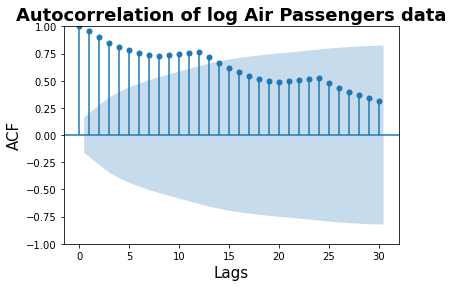

In [49]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# ACF plot of log(Airpassengers)
plot_acf(np.log(AirPassenger), lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of log Air Passengers data', fontsize=18, weight='bold')
plt.show()

Now, let us consider the Δ2log(AirPassengers) data which is stationary. We can observe from the figure that:

 
There is a significant difference between the ACF values between adjacent lags

The ACF values abruptly go towards 0 after lag 

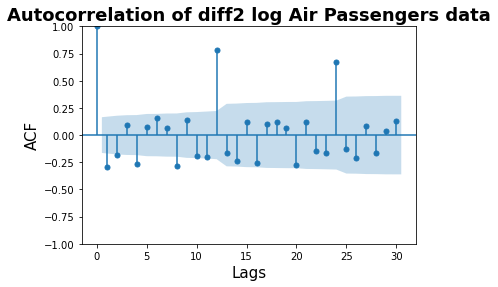

In [50]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# ACF plot of diff2(log(Airpassengers))
plot_acf(np.diff(np.log(AirPassenger).T.values[0], 2), lags=30)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('Autocorrelation of diff2 log Air Passengers data', fontsize=18, weight='bold')
plt.show()

The abrupt movement of the spike towards 0 signifies that Δ2log(AirPassengers) data might have MA(q) component. The lag after which the value of ACF is between the shaded area is chosen as the value of q. Here we can observe that q = 2.

If a model is only MA(q) model then the spikes in the ACF plot goes abruptly towards zero (i.e the difference between the first and the second lag is significant) and in PACF spikes decay towards zero after.

### PACF

Partial auto correlations are used to measure the degree of association between Yt and Y(t-k) when the effects at other time lags 1,2,3,.., (k-1) are removed.

From the PACF plot of hsales data, we can make the following observations:

There is a significant difference between the PACF values between adjacent lags.

The PACF values abruptly go towards 0 after lag 6.

The abrupt movement of the spike towards 0 signifies hsales data might have AR(p) component. The lag after which the value of ACF is between the shaded area is chosen as the value of p. Here we can observe that p=6.

From the PACF plot of Δ2log(AirPassengers) data, we can make the following observations:

There is a significant difference between the PACF values between adjacent lags.

The PACF values abruptly go towards 0 after lag 2.

The abrupt movement of the spike towards 0 signifies Δ2log(AirPassengers) data might have AR(p) component. The lag after which the value of PACF is between the shaded area is chosen as the value of p. Here we can observe that p=2.

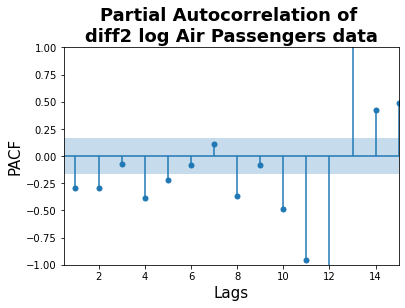

In [52]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot of diff2(log(Airpassengers))
plot_pacf(np.diff(np.log(AirPassenger).T.values[0], 2), lags=15)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('PACF', fontsize=15)
plt.xlim(0.5, 15)
plt.title('Partial Autocorrelation of \ndiff2 log Air Passengers data', fontsize=18, weight='bold')
plt.show()

Steps involved in Seasonal ARIMA (SARIMA) modeling:

If a series has seasonality and no trend, then we need to take a difference after lag 's', where 's' is the seasonality span. For instance, take the 12th difference for monthly data with seasonality.

If a series has a trend and no seasonality, then take the 1st difference. 

If a series has both trend and seasonality, then we need to apply a seasonal difference to the data and then re-evaluate the trend.  If the series still has a trend, then we need to take the 1st difference of seasonal differenced series.

If the series has a strong and consistent seasonality pattern, then we need to use seasonal differencing (D). But, the value of (d+D) should not be more than 2.

Determine the values of p and q as discussed earlier

In only seasonal autoregressive (SAR(1)) there are spikes in ACF at lag s,2s,3s, etc, while in PACF it cuts off after lag s.

In only seasonal moving average (SMA(1)) there are spikes in PACF at lag s,2s,3s, etc, while in ACF it cuts off after lag s.

If the autocorrelation at the seasonal period is positive consider adding a SAR term to the model, on the other hand, if the autocorrelation at the seasonal period is negative consider adding an SMA term to the model. Usually order of SAR and SMA is not more than 1. We should avoid mixing both SAR and SMA term. 

#### Parameters estimation
We have already figured out the values of p, and q which are 2, and 2. Also, we have differentiated the series to make it stationary, hence the value of d = 1.

Next, let us figure out the values corresponding to P, Q, and D. From the ACF and PACF plots of Δ2log(AirPassengers) we can observe a spike in lag (seasonal, S = 12) 12 and therefore can estimate that the values of P, as well as Q, is 1. Furthermore, the original series has a stable seasonal pattern over time, and therefore D = 1.

#### Model building
Let us build the model using SARIMA function available under Statsmodels package. We will split the data into 2 parts one for training and the other used for forecasting/testing. 

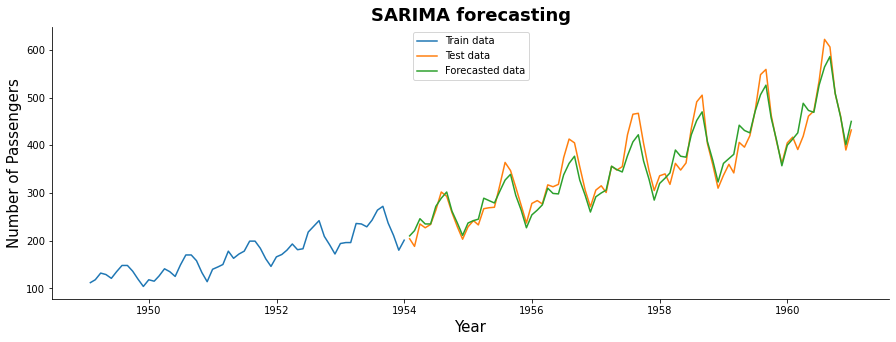

In [53]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 60
# Model building
model = SARIMAX(np.log(AirPassenger.iloc[:k]), 
                order=(2, 1, 2), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit(disp=False)
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(AirPassenger.iloc[:k], label='Train data')
plt.plot(AirPassenger.iloc[k:], label='Test data')
plt.plot(np.round(np.exp(model_fit.forecast(144-k))), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('SARIMA forecasting', fontsize=18, weight='bold')
plt.show()

#### Model evaluation
We use RMSE to find the performance of the current model.

In [54]:
# Importing libraries
import numpy as np
#finding the mean squared error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(AirPassenger.iloc[k:], np.round(np.exp(model_fit.forecast(144-k)))))

23.46552689331634

#### Conclusion
As we can observe from the figure that the model has forecasted 4 years of data quite well with an RMSE of 23. 

Finding the parameters manually can be challenging sometimes, therefore next you will learn about grid search which creates different models on a range of parameters and gets the best based on AIC/BIC value.

### Grid search

to find the optimum values of p, d, q, and P, D, Q, we can iterate over a given range of values and find the RMSE of each model. Later, the model with the least RMSE can be considered as the best model.

In [55]:
# Importing libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Iterating over parameters
rmse = []
params = []
for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(3):
                for D in range(2):
                    for Q in range(3):            
                        try:
                            model = SARIMAX(np.log(AirPassenger.iloc[:k]), 
                                            order=(p, d, q), 
                                            seasonal_order=(P, D, Q, 12), 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)                            
                            rmse.append(np.sqrt(mean_squared_error(AirPassenger.iloc[k:], 
                                                np.round(np.exp(model_fit.forecast(144-k))))))
                            params.append(((p, d, q), (P, D, Q)))
                        except:
                            pass
                        
# Storing RMSE and parameters and sorting the dataframe based on RMSE in ascending order
res = pd.DataFrame([rmse, params]).T.sort_values([0])
res.columns = ['RMSE', 'Params']
res.head(1)

import warnings
warnings.ig

C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Convergence

C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Convergence

C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Convergence

C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shrinath\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Convergence

,RMSE,Params
320,23.328911,"((2, 1, 2), (2, 1, 1))"


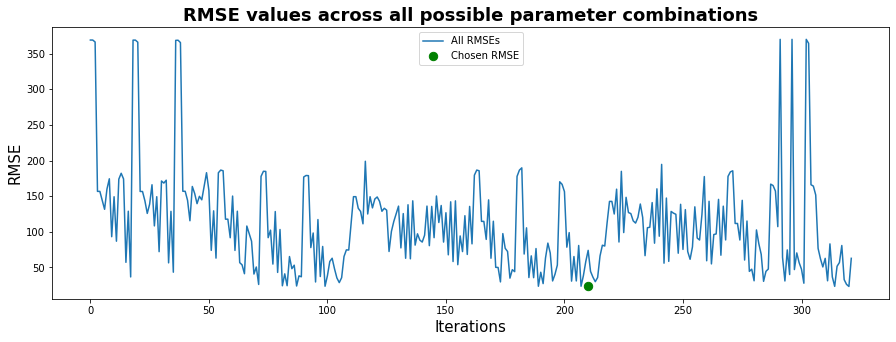

In [56]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
# plotting RMSE values across all possible parameter combinations
plt.figure(figsize=(15, 5))
plt.plot(rmse, label='All RMSEs')
plt.scatter(np.arange(210, 211), res.iloc[0, 0], s=70, c='g', label='Chosen RMSE')
plt.legend()
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('RMSE values across all possible parameter combinations', weight='bold', fontsize=18)
plt.show()